In [12]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, classification_report

In [ ]:
np.random.seed(42)

df = pd.read_csv("cleaned_rainfall_flood_prediction.csv")

# ============= MULTIVARIATE DATA PREPARATION =============
state = "BIHAR"  # Choose a specific state for multivariate analysis
df_s = df[df["SUBDIVISION"] == state].sort_values("YEAR").reset_index(drop=True)

print(f"Selected state: {state}")
print(f"Records for {state}: {len(df_s)}")
print(f"Year range: {df_s['YEAR'].min()} to {df_s['YEAR'].max()}")

series_jun = df_s["Jun-Sep"].to_numpy()
series_ann = df_s["ANNUAL"].to_numpy()

# Choose number of lags for Jun-Sep
L = 2  # uses current, t-1, t-2

def z(x):
    """Standardize time series"""
    x = np.asarray(x, dtype=float)
    return (x - x.mean()) / x.std()

# Build aligned channels (all same length = len(series_jun) - L)
u_jun_0 = z(series_jun[L:])         # current Jun-Sep
u_ann_0 = z(series_ann[L:])         # current ANNUAL  
u_jun_l1 = z(series_jun[L-1:-1])    # Jun-Sep lag 1
u_jun_l2 = z(series_jun[L-2:-2])    # Jun-Sep lag 2

channels = [u_jun_0, u_ann_0, u_jun_l1, u_jun_l2]
total_len = len(channels[0])
assert all(len(ch) == total_len for ch in channels)

print(f"Multivariate channels created:")
print(f"  - Current Jun-Sep (u_jun_0): length {len(u_jun_0)}")
print(f"  - Current Annual (u_ann_0): length {len(u_ann_0)}")
print(f"  - Jun-Sep lag 1 (u_jun_l1): length {len(u_jun_l1)}")
print(f"  - Jun-Sep lag 2 (u_jun_l2): length {len(u_jun_l2)}")
print(f"  - Total aligned length: {total_len}")

# Labels aligned to the truncated series
flood_threshold = np.percentile(series_jun, 80)  # per-state threshold
flood_labels = (series_jun[L:] > flood_threshold).astype(int)

print(f"Flood threshold (80th percentile for {state}): {flood_threshold:.1f} mm")
print(f"  Low risk (0): {np.sum(flood_labels == 0)} records")
print(f"  High risk (1): {np.sum(flood_labels == 1)} records")

# Time axis for quantum evolution
times = np.arange(total_len)

Dataset loaded: 3996 records
Year range: 1901 to 2015
Number of subdivisions: 36
Flood threshold (80th percentile): 1385.9 mm
  Low risk (0): 3197 records
  High risk (1): 799 records


In [ ]:


# Check 1: System Dimensions
print("\n1. SYSTEM DIMENSIONS:")
print(f"   Photon states (N_photons): {N_photons}")
print(f"   Number of atoms: {num_atoms}")
print(f"   Total Hilbert space dimension: {N_photons * (2**num_atoms)}")
print(f"   Expected dimension: {N_photons} × 2^{num_atoms} = {N_photons * (2**num_atoms)}")

# Check 2: Hamiltonian Properties
print("\n2. HAMILTONIAN PROPERTIES:")
print(f"   H0 shape: {H0.shape}")
print(f"   H0 is Hermitian: {H0.isherm}")
print(f"   H0 trace: {H0.tr():.3f}")
print(f"   H0 eigenvalues (first 5): {H0.eigenenergies()[:5]}")

# Check 3: Operator Properties
print("\n3. OPERATOR PROPERTIES:")
print(f"   Cavity operator 'c' shape: {c.shape}")
print(f"   Cavity operator 'c†' shape: {c.dag().shape}")
print(f"   Atom operators 'σ⁻' shapes: {[sm.shape for sm in sm_list]}")
print(f"   Atom operators 'σz' shapes: {[sz.shape for sz in sz_list]}")

# Check 4: Commutation Relations
print("\n4. COMMUTATION RELATIONS:")
print(f"   [c, c†] = {qt.commutator(c, c.dag())}")
print(f"   [σz, σ⁻] = {qt.commutator(sz_list[0], sm_list[0])}")

# Check 5: Initial State
print("\n5. INITIAL STATE:")
print(f"   Initial state shape: {psi0.shape}")
print(f"   Initial state norm: {psi0.norm():.6f}")
print(f"   Initial state is normalized: {abs(psi0.norm() - 1.0) < 1e-10}")

# Check 6: Readout Operators
print("\n6. READOUT OPERATORS:")
print(f"   Number of readout operators: {len(e_ops)}")
print(f"   Readout operator shapes: {[op.shape for op in e_ops]}")
print(f"   All operators Hermitian: {all(op.isherm for op in e_ops)}")

# Check 7: Collapse Operators (Decoherence)
print("\n7. COLLAPSE OPERATORS (DECOHERENCE):")
print(f"   Number of collapse operators: {len(c_ops)}")
print(f"   Collapse operator shapes: {[op.shape for op in c_ops]}")

# Check 8: Energy Conservation
print("\n8. ENERGY CONSERVATION:")
print(f"   Initial energy: {qt.expect(H0, psi0):.3f}")
print(f"   Energy units: Cavity frequency = {wc}, Atom frequencies = {wa_list}")

# Check 9: System Evolution Test
print("\n9. SYSTEM EVOLUTION TEST:")
print("   Testing short evolution (5 time steps)...")
test_times = np.linspace(0, 0.1, 5)
test_result = qt.mesolve(H0, psi0, test_times, c_ops, e_ops,options=qt.Options(store_states=True))
print(f"   Evolution successful: {test_result is not None}")
print(f"   Final state norm: {test_result.states[-1].norm():.6f}")

# Check 10: Reservoir Response
print("\n10. RESERVOIR RESPONSE:")
print("   Testing reservoir with simple input...")
simple_input = np.ones(10) * 0.1  # Small constant input
test_H = [H0, [H1_operator, simple_input]]
test_result = qt.mesolve(test_H, psi0, np.arange(10), c_ops, e_ops)
print(f"   Reservoir response test successful: {test_result is not None}")

print("\n=== DIAGNOSTICS COMPLETE ===")
print("If all checks passed, your quantum reservoir is built correctly!")


1. SYSTEM DIMENSIONS:
   Photon states (N_photons): 5
   Number of atoms: 3
   Total Hilbert space dimension: 40
   Expected dimension: 5 × 2^3 = 40

2. HAMILTONIAN PROPERTIES:
   H0 shape: (40, 40)
   H0 is Hermitian: True
   H0 trace: 3200.000
   H0 eigenvalues (first 5): [-68.68703255 -67.58667785 -56.74493709 -56.62126156 -30.        ]

3. OPERATOR PROPERTIES:
   Cavity operator 'c' shape: (40, 40)
   Cavity operator 'c†' shape: (40, 40)
   Atom operators 'σ⁻' shapes: [(40, 40), (40, 40), (40, 40)]
   Atom operators 'σz' shapes: [(40, 40), (40, 40), (40, 40)]

4. COMMUTATION RELATIONS:
   [c, c†] = Quantum object: dims=[[5, 2, 2, 2], [5, 2, 2, 2]], shape=(40, 40), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  0.  0.]
 [ 0.  0.  0. ...  0. -4.  0.]
 [ 0.  0.  0. ...  0.  0. -4.]]
   [σz, σ⁻] = Quantum object: dims=[[5, 2, 2, 2], [5, 2, 2, 2]], shape=(40, 40), t

c:\Users\Priyanshi\anaconda3\envs\qisk\Lib\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


   Reservoir response test successful: True

=== DIAGNOSTICS COMPLETE ===
If all checks passed, your quantum reservoir is built correctly!


In [ ]:


# Check 1: System Dimensions
print("\n1. SYSTEM DIMENSIONS:")
print(f"   Photon states (N_photons): {N_photons}")
print(f"   Number of atoms: {num_atoms}")
print(f"   Total Hilbert space dimension: {N_photons * (2**num_atoms)}")
print(f"   Expected dimension: {N_photons} × 2^{num_atoms} = {N_photons * (2**num_atoms)}")

# Check 2: Hamiltonian Properties
print("\n2. HAMILTONIAN PROPERTIES:")
print(f"   H0 shape: {H0.shape}")
print(f"   H0 is Hermitian: {H0.isherm}")
print(f"   H0 trace: {H0.tr():.3f}")
print(f"   H0 eigenvalues (first 5): {H0.eigenenergies()[:5]}")

# Check 3: Operator Properties
print("\n3. OPERATOR PROPERTIES:")
print(f"   Cavity operator 'c' shape: {c.shape}")
print(f"   Cavity operator 'c†' shape: {c.dag().shape}")
print(f"   Atom operators 'σ⁻' shapes: {[sm.shape for sm in sm_list]}")
print(f"   Atom operators 'σz' shapes: {[sz.shape for sz in sz_list]}")

# Check 4: Commutation Relations
print("\n4. COMMUTATION RELATIONS:")
print(f"   [c, c†] = {qt.commutator(c, c.dag())}")
print(f"   [σz, σ⁻] = {qt.commutator(sz_list[0], sm_list[0])}")

# Check 5: Initial State
print("\n5. INITIAL STATE:")
print(f"   Initial state shape: {psi0.shape}")
print(f"   Initial state norm: {psi0.norm():.6f}")
print(f"   Initial state is normalized: {abs(psi0.norm() - 1.0) < 1e-10}")

# Check 6: Readout Operators
print("\n6. READOUT OPERATORS:")
print(f"   Number of readout operators: {len(e_ops)}")
print(f"   Readout operator shapes: {[op.shape for op in e_ops]}")
print(f"   All operators Hermitian: {all(op.isherm for op in e_ops)}")

# Check 7: Collapse Operators (Decoherence)
print("\n7. COLLAPSE OPERATORS (DECOHERENCE):")
print(f"   Number of collapse operators: {len(c_ops)}")
print(f"   Collapse operator shapes: {[op.shape for op in c_ops]}")

# Check 8: Energy Conservation
print("\n8. ENERGY CONSERVATION:")
print(f"   Initial energy: {qt.expect(H0, psi0):.3f}")
print(f"   Energy units: Cavity frequency = {wc}, Atom frequencies = {wa_list}")

# Check 9: System Evolution Test
print("\n9. SYSTEM EVOLUTION TEST:")
print("   Testing short evolution (5 time steps)...")
test_times = np.linspace(0, 0.1, 5)
test_result = qt.mesolve(H0, psi0, test_times, c_ops, e_ops,options=qt.Options(store_states=True))
print(f"   Evolution successful: {test_result is not None}")
print(f"   Final state norm: {test_result.states[-1].norm():.6f}")

# Check 10: Reservoir Response
print("\n10. RESERVOIR RESPONSE:")
print("   Testing reservoir with simple input...")
simple_input = np.ones(10) * 0.1  # Small constant input
test_H = [H0, [H1_operator, simple_input]]
test_result = qt.mesolve(test_H, psi0, np.arange(10), c_ops, e_ops)
print(f"   Reservoir response test successful: {test_result is not None}")

print("\n=== DIAGNOSTICS COMPLETE ===")
print("If all checks passed, your quantum reservoir is built correctly!")


1. SYSTEM DIMENSIONS:
   Photon states (N_photons): 5
   Number of atoms: 3
   Total Hilbert space dimension: 40
   Expected dimension: 5 × 2^3 = 40

2. HAMILTONIAN PROPERTIES:
   H0 shape: (40, 40)
   H0 is Hermitian: True
   H0 trace: 3200.000
   H0 eigenvalues (first 5): [-68.68703255 -67.58667785 -56.74493709 -56.62126156 -30.        ]

3. OPERATOR PROPERTIES:
   Cavity operator 'c' shape: (40, 40)
   Cavity operator 'c†' shape: (40, 40)
   Atom operators 'σ⁻' shapes: [(40, 40), (40, 40), (40, 40)]
   Atom operators 'σz' shapes: [(40, 40), (40, 40), (40, 40)]

4. COMMUTATION RELATIONS:
   [c, c†] = Quantum object: dims=[[5, 2, 2, 2], [5, 2, 2, 2]], shape=(40, 40), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  0.  0.]
 [ 0.  0.  0. ...  0. -4.  0.]
 [ 0.  0.  0. ...  0.  0. -4.]]
   [σz, σ⁻] = Quantum object: dims=[[5, 2, 2, 2], [5, 2, 2, 2]], shape=(40, 40), t

c:\Users\Priyanshi\anaconda3\envs\qisk\Lib\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


   Reservoir response test successful: True

=== DIAGNOSTICS COMPLETE ===
If all checks passed, your quantum reservoir is built correctly!


In [ ]:


# Check 1: System Dimensions
print("\n1. SYSTEM DIMENSIONS:")
print(f"   Photon states (N_photons): {N_photons}")
print(f"   Number of atoms: {num_atoms}")
print(f"   Total Hilbert space dimension: {N_photons * (2**num_atoms)}")
print(f"   Expected dimension: {N_photons} × 2^{num_atoms} = {N_photons * (2**num_atoms)}")

# Check 2: Hamiltonian Properties
print("\n2. HAMILTONIAN PROPERTIES:")
print(f"   H0 shape: {H0.shape}")
print(f"   H0 is Hermitian: {H0.isherm}")
print(f"   H0 trace: {H0.tr():.3f}")
print(f"   H0 eigenvalues (first 5): {H0.eigenenergies()[:5]}")

# Check 3: Operator Properties
print("\n3. OPERATOR PROPERTIES:")
print(f"   Cavity operator 'c' shape: {c.shape}")
print(f"   Cavity operator 'c†' shape: {c.dag().shape}")
print(f"   Atom operators 'σ⁻' shapes: {[sm.shape for sm in sm_list]}")
print(f"   Atom operators 'σz' shapes: {[sz.shape for sz in sz_list]}")

# Check 4: Commutation Relations
print("\n4. COMMUTATION RELATIONS:")
print(f"   [c, c†] = {qt.commutator(c, c.dag())}")
print(f"   [σz, σ⁻] = {qt.commutator(sz_list[0], sm_list[0])}")

# Check 5: Initial State
print("\n5. INITIAL STATE:")
print(f"   Initial state shape: {psi0.shape}")
print(f"   Initial state norm: {psi0.norm():.6f}")
print(f"   Initial state is normalized: {abs(psi0.norm() - 1.0) < 1e-10}")

# Check 6: Readout Operators
print("\n6. READOUT OPERATORS:")
print(f"   Number of readout operators: {len(e_ops)}")
print(f"   Readout operator shapes: {[op.shape for op in e_ops]}")
print(f"   All operators Hermitian: {all(op.isherm for op in e_ops)}")

# Check 7: Collapse Operators (Decoherence)
print("\n7. COLLAPSE OPERATORS (DECOHERENCE):")
print(f"   Number of collapse operators: {len(c_ops)}")
print(f"   Collapse operator shapes: {[op.shape for op in c_ops]}")

# Check 8: Energy Conservation
print("\n8. ENERGY CONSERVATION:")
print(f"   Initial energy: {qt.expect(H0, psi0):.3f}")
print(f"   Energy units: Cavity frequency = {wc}, Atom frequencies = {wa_list}")

# Check 9: System Evolution Test
print("\n9. SYSTEM EVOLUTION TEST:")
print("   Testing short evolution (5 time steps)...")
test_times = np.linspace(0, 0.1, 5)
test_result = qt.mesolve(H0, psi0, test_times, c_ops, e_ops,options=qt.Options(store_states=True))
print(f"   Evolution successful: {test_result is not None}")
print(f"   Final state norm: {test_result.states[-1].norm():.6f}")

# Check 10: Reservoir Response
print("\n10. RESERVOIR RESPONSE:")
print("   Testing reservoir with simple input...")
simple_input = np.ones(10) * 0.1  # Small constant input
test_H = [H0, [H1_operator, simple_input]]
test_result = qt.mesolve(test_H, psi0, np.arange(10), c_ops, e_ops)
print(f"   Reservoir response test successful: {test_result is not None}")

print("\n=== DIAGNOSTICS COMPLETE ===")
print("If all checks passed, your quantum reservoir is built correctly!")


1. SYSTEM DIMENSIONS:
   Photon states (N_photons): 5
   Number of atoms: 3
   Total Hilbert space dimension: 40
   Expected dimension: 5 × 2^3 = 40

2. HAMILTONIAN PROPERTIES:
   H0 shape: (40, 40)
   H0 is Hermitian: True
   H0 trace: 3200.000
   H0 eigenvalues (first 5): [-68.68703255 -67.58667785 -56.74493709 -56.62126156 -30.        ]

3. OPERATOR PROPERTIES:
   Cavity operator 'c' shape: (40, 40)
   Cavity operator 'c†' shape: (40, 40)
   Atom operators 'σ⁻' shapes: [(40, 40), (40, 40), (40, 40)]
   Atom operators 'σz' shapes: [(40, 40), (40, 40), (40, 40)]

4. COMMUTATION RELATIONS:
   [c, c†] = Quantum object: dims=[[5, 2, 2, 2], [5, 2, 2, 2]], shape=(40, 40), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  0.  0.]
 [ 0.  0.  0. ...  0. -4.  0.]
 [ 0.  0.  0. ...  0.  0. -4.]]
   [σz, σ⁻] = Quantum object: dims=[[5, 2, 2, 2], [5, 2, 2, 2]], shape=(40, 40), t

c:\Users\Priyanshi\anaconda3\envs\qisk\Lib\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


   Reservoir response test successful: True

=== DIAGNOSTICS COMPLETE ===
If all checks passed, your quantum reservoir is built correctly!


In [ ]:


# Check 1: System Dimensions
print("\n1. SYSTEM DIMENSIONS:")
print(f"   Photon states (N_photons): {N_photons}")
print(f"   Number of atoms: {num_atoms}")
print(f"   Total Hilbert space dimension: {N_photons * (2**num_atoms)}")
print(f"   Expected dimension: {N_photons} × 2^{num_atoms} = {N_photons * (2**num_atoms)}")

# Check 2: Hamiltonian Properties
print("\n2. HAMILTONIAN PROPERTIES:")
print(f"   H0 shape: {H0.shape}")
print(f"   H0 is Hermitian: {H0.isherm}")
print(f"   H0 trace: {H0.tr():.3f}")
print(f"   H0 eigenvalues (first 5): {H0.eigenenergies()[:5]}")

# Check 3: Operator Properties
print("\n3. OPERATOR PROPERTIES:")
print(f"   Cavity operator 'c' shape: {c.shape}")
print(f"   Cavity operator 'c†' shape: {c.dag().shape}")
print(f"   Atom operators 'σ⁻' shapes: {[sm.shape for sm in sm_list]}")
print(f"   Atom operators 'σz' shapes: {[sz.shape for sz in sz_list]}")

# Check 4: Commutation Relations
print("\n4. COMMUTATION RELATIONS:")
print(f"   [c, c†] = {qt.commutator(c, c.dag())}")
print(f"   [σz, σ⁻] = {qt.commutator(sz_list[0], sm_list[0])}")

# Check 5: Initial State
print("\n5. INITIAL STATE:")
print(f"   Initial state shape: {psi0.shape}")
print(f"   Initial state norm: {psi0.norm():.6f}")
print(f"   Initial state is normalized: {abs(psi0.norm() - 1.0) < 1e-10}")

# Check 6: Readout Operators
print("\n6. READOUT OPERATORS:")
print(f"   Number of readout operators: {len(e_ops)}")
print(f"   Readout operator shapes: {[op.shape for op in e_ops]}")
print(f"   All operators Hermitian: {all(op.isherm for op in e_ops)}")

# Check 7: Collapse Operators (Decoherence)
print("\n7. COLLAPSE OPERATORS (DECOHERENCE):")
print(f"   Number of collapse operators: {len(c_ops)}")
print(f"   Collapse operator shapes: {[op.shape for op in c_ops]}")

# Check 8: Energy Conservation
print("\n8. ENERGY CONSERVATION:")
print(f"   Initial energy: {qt.expect(H0, psi0):.3f}")
print(f"   Energy units: Cavity frequency = {wc}, Atom frequencies = {wa_list}")

# Check 9: System Evolution Test
print("\n9. SYSTEM EVOLUTION TEST:")
print("   Testing short evolution (5 time steps)...")
test_times = np.linspace(0, 0.1, 5)
test_result = qt.mesolve(H0, psi0, test_times, c_ops, e_ops,options=qt.Options(store_states=True))
print(f"   Evolution successful: {test_result is not None}")
print(f"   Final state norm: {test_result.states[-1].norm():.6f}")

# Check 10: Reservoir Response
print("\n10. RESERVOIR RESPONSE:")
print("   Testing reservoir with simple input...")
simple_input = np.ones(10) * 0.1  # Small constant input
test_H = [H0, [H1_operator, simple_input]]
test_result = qt.mesolve(test_H, psi0, np.arange(10), c_ops, e_ops)
print(f"   Reservoir response test successful: {test_result is not None}")

print("\n=== DIAGNOSTICS COMPLETE ===")
print("If all checks passed, your quantum reservoir is built correctly!")


1. SYSTEM DIMENSIONS:
   Photon states (N_photons): 5
   Number of atoms: 3
   Total Hilbert space dimension: 40
   Expected dimension: 5 × 2^3 = 40

2. HAMILTONIAN PROPERTIES:
   H0 shape: (40, 40)
   H0 is Hermitian: True
   H0 trace: 3200.000
   H0 eigenvalues (first 5): [-68.68703255 -67.58667785 -56.74493709 -56.62126156 -30.        ]

3. OPERATOR PROPERTIES:
   Cavity operator 'c' shape: (40, 40)
   Cavity operator 'c†' shape: (40, 40)
   Atom operators 'σ⁻' shapes: [(40, 40), (40, 40), (40, 40)]
   Atom operators 'σz' shapes: [(40, 40), (40, 40), (40, 40)]

4. COMMUTATION RELATIONS:
   [c, c†] = Quantum object: dims=[[5, 2, 2, 2], [5, 2, 2, 2]], shape=(40, 40), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  0.  0.]
 [ 0.  0.  0. ...  0. -4.  0.]
 [ 0.  0.  0. ...  0.  0. -4.]]
   [σz, σ⁻] = Quantum object: dims=[[5, 2, 2, 2], [5, 2, 2, 2]], shape=(40, 40), t

c:\Users\Priyanshi\anaconda3\envs\qisk\Lib\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


   Reservoir response test successful: True

=== DIAGNOSTICS COMPLETE ===
If all checks passed, your quantum reservoir is built correctly!


In [14]:
rainfall_mean = rainfall_data.mean()
rainfall_std = rainfall_data.std()
input_signal = (rainfall_data - rainfall_mean) / rainfall_std

print(f"  Mean: {input_signal.mean():.3f}")
print(f"  Std: {input_signal.std():.3f}")
print(f"  Min: {input_signal.min():.3f}")
print(f"  Max: {input_signal.max():.3f}")

  Mean: 0.000
  Std: 1.000
  Min: -1.542
  Max: 3.508


In [ ]:

num_atoms = 3        # 3 atoms for good feature richness
N_photons = 5        # 5 photon states (balanced performance/speed)
wc = 40.0            # Cavity frequency
wa_list = np.linspace(0, 40, num_atoms)  # Different frequencies for each atom
g = 30.0             # Coupling strength
kappa = 10.0         # Decay rate
epsilon = 20.0       # Input signal strength


def tensor_op(op, j, num_particles, particle_dims):
    op_list = [qt.qeye(dim) for dim in particle_dims]
    op_list[j] = op
    return qt.tensor(op_list)

# Build the quantum system
particle_dims = [N_photons] + [2] * num_atoms
c = tensor_op(qt.destroy(N_photons), 0, num_atoms + 1, particle_dims)
sm_list = [tensor_op(qt.sigmam(), i + 1, num_atoms + 1, particle_dims) for i in range(num_atoms)]
sz_list = [tensor_op(qt.sigmaz(), i + 1, num_atoms + 1, particle_dims) for i in range(num_atoms)]

# The drift Hamiltonian
H0 = wc * c.dag() * c
for i in range(num_atoms):
    H0 += 0.5 * wa_list[i] * sz_list[i]
    H0 += g * (c.dag() * sm_list[i] + c * sm_list[i].dag())

# ============= MULTIPLE DRIVE OPERATORS FOR MULTIVARIATE INPUTS =============
# Define multiple drive operators for richness - one for each input channel
H1_ops = [
    epsilon * 1j * (c - c.dag()),  # cavity quadrature (I) - for u_jun_0
    epsilon * (c + c.dag()),       # cavity quadrature (Q) - for u_ann_0
    epsilon * tensor_op(qt.sigmax(), 1, num_atoms + 1, particle_dims),  # atom 1 - for u_jun_l1
    epsilon * tensor_op(qt.sigmax(), 2, num_atoms + 1, particle_dims),  # atom 2 - for u_jun_l2
]

print(f"Created {len(H1_ops)} drive operators for {len(channels)} input channels")
print(f"Drive operator shapes: {[op.shape for op in H1_ops]}")

# If you have more channels than operators, you can cycle H1_ops
# For now we have exactly 4 operators for 4 channels


scaled_kappa = kappa / (2 * num_atoms + 2)
c_ops = [np.sqrt(scaled_kappa) * c]
for i in range(num_atoms):
    c_ops.append(np.sqrt(scaled_kappa) * sm_list[i])



# ============= MULTIVARIATE HAMILTONIAN CONSTRUCTION =============
# Assemble time-dependent Hamiltonian with multiple drive channels
H = [H0]
for op, coeff in zip(H1_ops, channels):
    H.append([op, coeff])

print(f"Hamiltonian structure:")
print(f"  - H0 (drift): {H0.shape}")
for i, (op, coeff) in enumerate(zip(H1_ops, channels)):
    print(f"  - H1_{i} (channel {i}): {op.shape}, coeff length: {len(coeff)}")

# Split data for training and testing (using total_len from multivariate data)
warmup_len = 50     # Removes transient effects; ensures features depend on the recent input history, not on psi0
train_len = int(0.7 * total_len)  # 70% for training
test_len = total_len - warmup_len - train_len  # Rest for testing

print(f"Data split: Warmup={warmup_len}, Train={train_len}, Test={test_len}")

# Initial quantum state
psi0 = qt.tensor([qt.basis(N_photons, 0)] + [qt.basis(2, 0)] * num_atoms)

# Readout operators: cavity and atomic observables
e_ops = [c + c.dag(), 1j * (c.dag() - c)]  # Cavity quadratures
for i in range(num_atoms):
    sx = tensor_op(qt.sigmax(), i + 1, num_atoms + 1, particle_dims)
    sy = tensor_op(qt.sigmay(), i + 1, num_atoms + 1, particle_dims)
    e_ops.extend([sx, sy])

print(f"Evolution setup:")
print(f"  - Time steps: {len(times)}")
print(f"  - Readout operators: {len(e_ops)}")

# Run quantum simulation with multivariate inputs
result = qt.mesolve(H, psi0, times, c_ops, e_ops, options=qt.Options(store_states=True))

Data split: Warmup=50, Train=2797, Test=1149


c:\Users\Priyanshi\anaconda3\envs\qisk\Lib\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


In [26]:
# Extract reservoir readouts
readouts = np.array(result.expect).T

# Prepare training data
X_raw_train = readouts[warmup_len : warmup_len + train_len]
Y_train = flood_labels[warmup_len : warmup_len + train_len]

# Prepare test data
X_raw_test = readouts[warmup_len + train_len : warmup_len + train_len + test_len]
Y_test_actual = flood_labels[warmup_len + train_len : warmup_len + train_len + test_len]

# Create polynomial features for non-linear flood patterns

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_raw_train)
X_poly_test = poly.transform(X_raw_test)

# Add bias term
X_train = np.hstack([np.ones((X_poly_train.shape[0], 1)), X_poly_train])
X_test = np.hstack([np.ones((X_poly_test.shape[0], 1)), X_poly_test])

# Train the model using pseudoinverse
W = np.linalg.pinv(X_train) @ Y_train

In [27]:
# Make predictions
Y_predicted_raw = X_test @ W
Y_predicted = (Y_predicted_raw > 0.5).astype(int)  # Convert to binary

# Calculate metrics
mse = mean_squared_error(Y_test_actual, Y_predicted_raw)
accuracy = np.mean(Y_predicted == Y_test_actual)

print(f"  MSE: {mse:.4f}")
print(f"  Accuracy: {accuracy:.3f}")

print(classification_report(Y_test_actual, Y_predicted, 
                          target_names=['Low Flood Risk', 'High Flood Risk']))

  MSE: 0.0055
  Accuracy: 0.998
                 precision    recall  f1-score   support

 Low Flood Risk       1.00      1.00      1.00      1017
High Flood Risk       1.00      0.98      0.99       132

       accuracy                           1.00      1149
      macro avg       1.00      0.99      1.00      1149
   weighted avg       1.00      1.00      1.00      1149



In [28]:

readouts = np.array(result.expect).T

# Prepare training data
X_raw_train = readouts[warmup_len : warmup_len + train_len]
Y_train = flood_labels[warmup_len : warmup_len + train_len]

# Prepare test data
X_raw_test = readouts[warmup_len + train_len : warmup_len + train_len + test_len]
Y_test_actual = flood_labels[warmup_len + train_len : warmup_len + train_len + test_len]


poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_raw_train)
X_poly_test = poly.transform(X_raw_test)

# Add bias term
X_train = np.hstack([np.ones((X_poly_train.shape[0], 1)), X_poly_train])
X_test = np.hstack([np.ones((X_poly_test.shape[0], 1)), X_poly_test])


W = np.linalg.pinv(X_train) @ Y_train

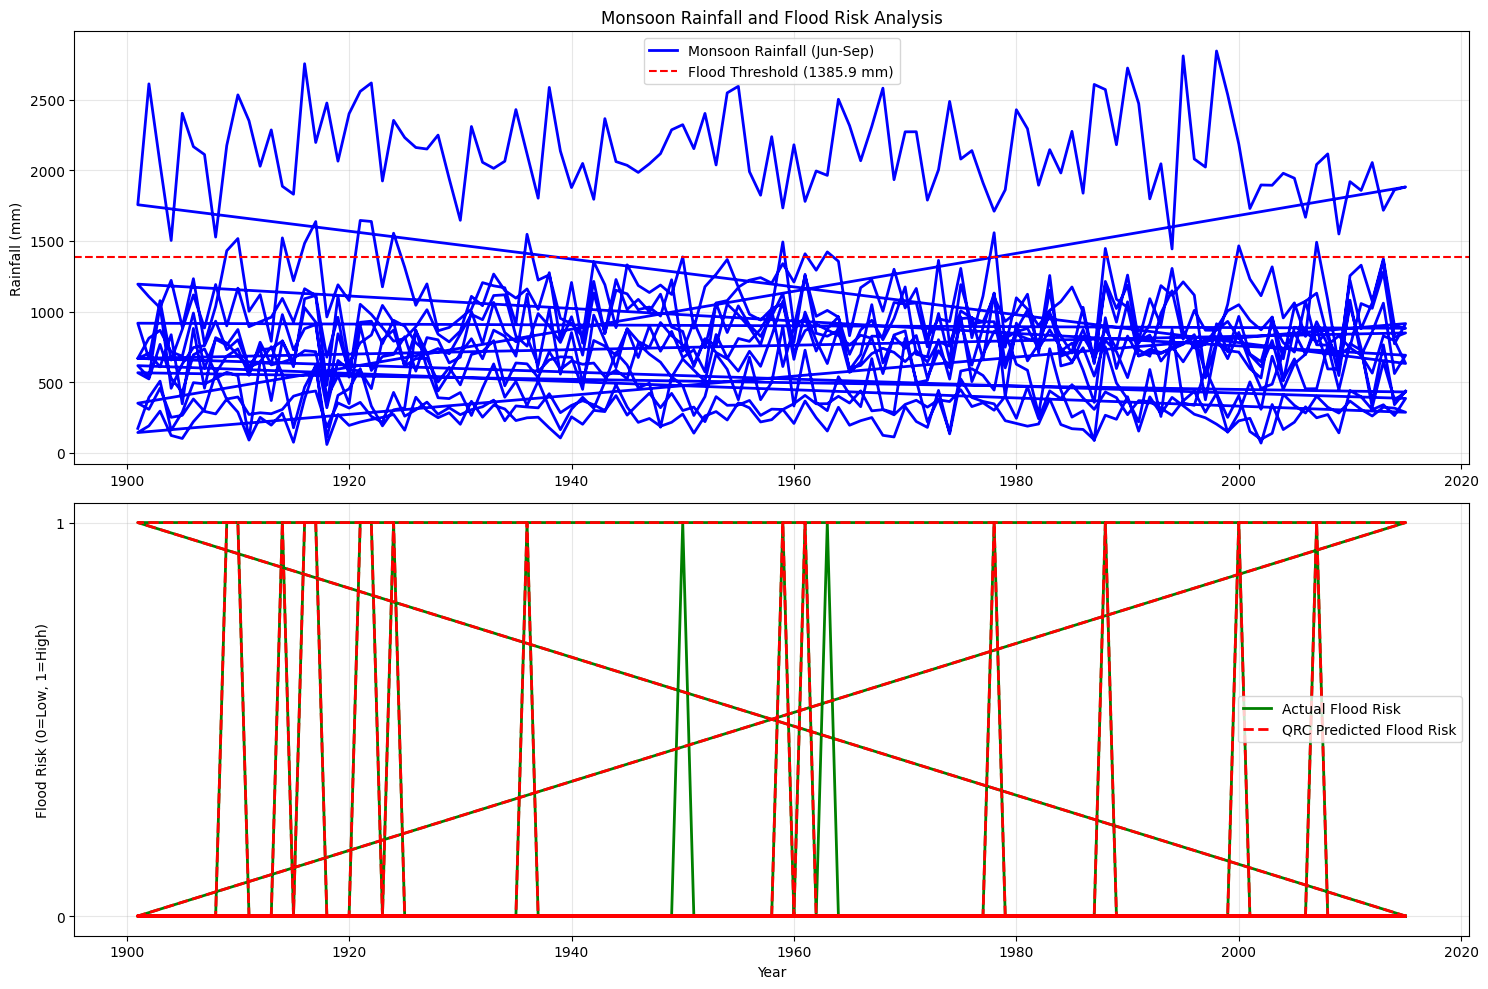

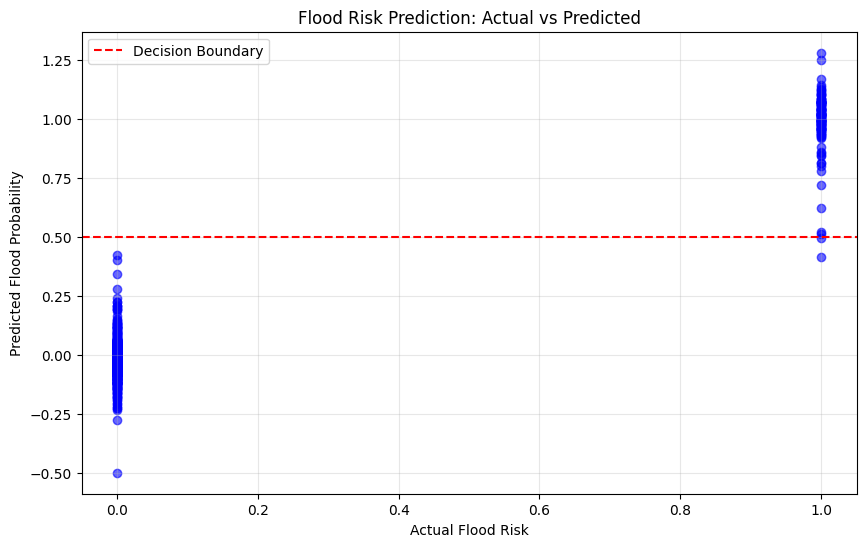

In [29]:

# Plot 1: Rainfall and flood risk over time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot rainfall data
test_years = years[warmup_len + train_len : warmup_len + train_len + test_len]
ax1.plot(test_years, rainfall_data[warmup_len + train_len : warmup_len + train_len + test_len], 
         'b-', label='Monsoon Rainfall (Jun-Sep)', linewidth=2)
ax1.axhline(y=flood_threshold, color='r', linestyle='--', label=f'Flood Threshold ({flood_threshold:.1f} mm)')
ax1.set_ylabel('Rainfall (mm)')
ax1.set_title('Monsoon Rainfall and Flood Risk Analysis')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot flood predictions
ax2.plot(test_years, Y_test_actual, 'g-', label='Actual Flood Risk', linewidth=2)
ax2.plot(test_years, Y_predicted, 'r--', label='QRC Predicted Flood Risk', linewidth=2)
ax2.set_ylabel('Flood Risk (0=Low, 1=High)')
ax2.set_xlabel('Year')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_yticks([0, 1])

plt.tight_layout()
plt.show()

# Plot 2: Prediction vs Actual scatter
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_actual, Y_predicted_raw, alpha=0.6, c='blue')
plt.axhline(y=0.5, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Actual Flood Risk')
plt.ylabel('Predicted Flood Probability')
plt.title('Flood Risk Prediction: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [31]:


# Check 1: System Dimensions
print("\n1. SYSTEM DIMENSIONS:")
print(f"   Photon states (N_photons): {N_photons}")
print(f"   Number of atoms: {num_atoms}")
print(f"   Total Hilbert space dimension: {N_photons * (2**num_atoms)}")
print(f"   Expected dimension: {N_photons} × 2^{num_atoms} = {N_photons * (2**num_atoms)}")

# Check 2: Hamiltonian Properties
print("\n2. HAMILTONIAN PROPERTIES:")
print(f"   H0 shape: {H0.shape}")
print(f"   H0 is Hermitian: {H0.isherm}")
print(f"   H0 trace: {H0.tr():.3f}")
print(f"   H0 eigenvalues (first 5): {H0.eigenenergies()[:5]}")

# Check 3: Operator Properties
print("\n3. OPERATOR PROPERTIES:")
print(f"   Cavity operator 'c' shape: {c.shape}")
print(f"   Cavity operator 'c†' shape: {c.dag().shape}")
print(f"   Atom operators 'σ⁻' shapes: {[sm.shape for sm in sm_list]}")
print(f"   Atom operators 'σz' shapes: {[sz.shape for sz in sz_list]}")

# Check 4: Commutation Relations
print("\n4. COMMUTATION RELATIONS:")
print(f"   [c, c†] = {qt.commutator(c, c.dag())}")
print(f"   [σz, σ⁻] = {qt.commutator(sz_list[0], sm_list[0])}")

# Check 5: Initial State
print("\n5. INITIAL STATE:")
print(f"   Initial state shape: {psi0.shape}")
print(f"   Initial state norm: {psi0.norm():.6f}")
print(f"   Initial state is normalized: {abs(psi0.norm() - 1.0) < 1e-10}")

# Check 6: Readout Operators
print("\n6. READOUT OPERATORS:")
print(f"   Number of readout operators: {len(e_ops)}")
print(f"   Readout operator shapes: {[op.shape for op in e_ops]}")
print(f"   All operators Hermitian: {all(op.isherm for op in e_ops)}")

# Check 7: Collapse Operators (Decoherence)
print("\n7. COLLAPSE OPERATORS (DECOHERENCE):")
print(f"   Number of collapse operators: {len(c_ops)}")
print(f"   Collapse operator shapes: {[op.shape for op in c_ops]}")

# Check 8: Energy Conservation
print("\n8. ENERGY CONSERVATION:")
print(f"   Initial energy: {qt.expect(H0, psi0):.3f}")
print(f"   Energy units: Cavity frequency = {wc}, Atom frequencies = {wa_list}")

# Check 9: System Evolution Test
print("\n9. SYSTEM EVOLUTION TEST:")
print("   Testing short evolution (5 time steps)...")
test_times = np.linspace(0, 0.1, 5)
test_result = qt.mesolve(H0, psi0, test_times, c_ops, e_ops,options=qt.Options(store_states=True))
print(f"   Evolution successful: {test_result is not None}")
print(f"   Final state norm: {test_result.states[-1].norm():.6f}")

# Check 10: Reservoir Response
print("\n10. RESERVOIR RESPONSE:")
print("   Testing reservoir with simple input...")
simple_input = np.ones(10) * 0.1  # Small constant input
test_H = [H0, [H1_operator, simple_input]]
test_result = qt.mesolve(test_H, psi0, np.arange(10), c_ops, e_ops)
print(f"   Reservoir response test successful: {test_result is not None}")

print("\n=== DIAGNOSTICS COMPLETE ===")
print("If all checks passed, your quantum reservoir is built correctly!")


1. SYSTEM DIMENSIONS:
   Photon states (N_photons): 5
   Number of atoms: 3
   Total Hilbert space dimension: 40
   Expected dimension: 5 × 2^3 = 40

2. HAMILTONIAN PROPERTIES:
   H0 shape: (40, 40)
   H0 is Hermitian: True
   H0 trace: 3200.000
   H0 eigenvalues (first 5): [-68.68703255 -67.58667785 -56.74493709 -56.62126156 -30.        ]

3. OPERATOR PROPERTIES:
   Cavity operator 'c' shape: (40, 40)
   Cavity operator 'c†' shape: (40, 40)
   Atom operators 'σ⁻' shapes: [(40, 40), (40, 40), (40, 40)]
   Atom operators 'σz' shapes: [(40, 40), (40, 40), (40, 40)]

4. COMMUTATION RELATIONS:
   [c, c†] = Quantum object: dims=[[5, 2, 2, 2], [5, 2, 2, 2]], shape=(40, 40), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  0.  0.]
 [ 0.  0.  0. ...  0. -4.  0.]
 [ 0.  0.  0. ...  0.  0. -4.]]
   [σz, σ⁻] = Quantum object: dims=[[5, 2, 2, 2], [5, 2, 2, 2]], shape=(40, 40), t

c:\Users\Priyanshi\anaconda3\envs\qisk\Lib\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


   Reservoir response test successful: True

=== DIAGNOSTICS COMPLETE ===
If all checks passed, your quantum reservoir is built correctly!
